### This code will hopefully highlight some of the windows of opportunity through scatter plots of quantiles of ... diagnostics. 

That's a mouthful?

In [1]:
##relevant import statements
import numpy as np
import math
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import scipy.stats

/knight/anaconda_jan21/envs/aug21/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load pickle files for gph
infile = open("../AnomERAVals/cap_gphanom.p", 'rb')
gp1 = pickle.load(infile)
infile.close()

## load files for SFC, 2m Temp
infile = open("../TemperatureGroupings/gl_850anom.p", 'rb')
tmp1 = pickle.load(infile)
infile.close()

infile = open("../TemperatureGroupings/cap_850anom.p", 'rb')
tmc1 = pickle.load(infile)
infile.close()

infile = open("../TemperatureGroupings/e_850anom.p", 'rb')
tme1 = pickle.load(infile)
infile.close()

infile = open("../EOFs/ehf100_latavg.p", 'rb')
ehf1 = pickle.load(infile)
infile.close()

In [3]:
## reduce temperature 
tmp1 = np.nanmean(tmp1, axis = 1)
tmp1 = np.nanmean(tmp1, axis = 1) ##avg temp anomaly over great lakes

tmc1 = np.nanmean(tmc1, axis = 1)
tmc1 = np.nanmean(tmc1, axis = 1) ##avg temp anomaly over cap

tme1 = np.nanmean(tme1, axis = 1)
tme1 = np.nanmean(tme1, axis = 1) ##avg temp anomaly over europe

In [4]:
tmp = tmp1.reshape((40,608))
tmc = tmc1.reshape((40,608))
tme = tme1.reshape((40,608))
gp = gp1.reshape((40,608))

**Import elliptical diagnostic values.**

All at 10-hPa: zonal-mean zonal wind, ephi, size, ratio, central lat/lon. 

In [5]:
infile = open("../New_EllipseVals/ephi50_79.p", 'rb')
ephi10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_ratio10_79.p", 'rb')
rat10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_size10_79.p", 'rb')
size10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_cenlat10_79.p", 'rb')
cenlat10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_cenlon10_79.p", 'rb')
cenlon10 = pickle.load(infile)
infile.close()

infile = open("../New_EllipseVals/ephi_wind10_79.p", 'rb')
wind10 = pickle.load(infile)
infile.close()

**Reduce datasets for lagging.**

In [6]:
ehf = ehf1.reshape((40,608))

In [7]:
##EOF date deletions 
ephi10 = np.delete(ephi10,[480,481,482,483,605,606,607],1)
rat10 = np.delete(rat10,[480,481,482,483,605,606,607],1)
size10 = np.delete(size10,[480,481,482,483,605,606,607],1)
cenlat10 = np.delete(cenlat10,[480,481,482,483,605,606,607],1)
cenlon10 = np.delete(cenlon10,[480,481,482,483,605,606,607],1)
wind10 = np.delete(wind10,[480,481,482,483,605,606,607],1)
gp = np.delete(gp,[480,481,482,483,605,606,607],1)
eh = np.delete(ehf,[480,481,482,483,605,606,607],1)

In [8]:
tp = np.delete(tmp,[480,481,482,483,605,606,607],1)

In [9]:
##10 day lag
w10 = np.empty((40,561))
e10 = np.empty((40,561))
s10 = np.empty((40,561))
r10 = np.empty((40,561))
ct10 = np.empty((40,561))
cn10 = np.empty((40,561))
g10 = np.empty((40,561))
eh10 = np.empty((40,561))

t10 = np.empty((40,561))

for i in range(0,40,1):
    w10[i,:] = wind10[i,:561]
    e10[i,:] = ephi10[i,:561]
    s10[i,:] = size10[i,:561]
    r10[i,:] = rat10[i,:561]
    ct10[i,:] = cenlat10[i,:561]
    cn10[i,:] = cenlon10[i,:561]
    g10[i,:] = gp[i,:561]
    eh10[i,:] = eh[i,:561]
    
    t10[i,:] = tp[i,40:]

In [10]:
##14 day lag
w14 = np.empty((40,545))
e14 = np.empty((40,545))
s14 = np.empty((40,545))
r14 = np.empty((40,545))
ct14 = np.empty((40,545))
cn14 = np.empty((40,545))
g14 = np.empty((40,545))
eh14 = np.empty((40,545))

t14 = np.empty((40,545))

for i in range(0,40,1):
    w14[i,:] = wind10[i,:545]
    e14[i,:] = ephi10[i,:545]
    s14[i,:] = size10[i,:545]
    r14[i,:] = rat10[i,:545]
    ct14[i,:] = cenlat10[i,:545]
    cn14[i,:] = cenlon10[i,:545]
    g14[i,:] = gp[i,:545]
    eh14[i,:] = eh[i,:545]
    
    t14[i,:] = tp[i,56:]

In [11]:
##20 day lag
w20 = np.empty((40,521))
e20 = np.empty((40,521))
s20 = np.empty((40,521))
r20 = np.empty((40,521))
ct20 = np.empty((40,521))
cn20 = np.empty((40,521))
g20 = np.empty((40,521))
eh20 = np.empty((40,521))

t20 = np.empty((40,521))

for i in range(0,40,1):
    w20[i,:] = wind10[i,:521]
    e20[i,:] = ephi10[i,:521]
    s20[i,:] = size10[i,:521]
    r20[i,:] = rat10[i,:521]
    ct20[i,:] = cenlat10[i,:521]
    cn20[i,:] = cenlon10[i,:521]
    g20[i,:] = gp[i,:521]
    eh20[i,:] = eh[i,:521]
    
    t20[i,:] = tp[i,80:]

**Reshape the arrays, but change for relevant lag in temp.**

In [12]:
##10-day = 22440

wind = np.reshape(w10, (22440))
rat = np.reshape(r10, (22440))
size = np.reshape(s10, (22440))
cenlt = np.reshape(ct10, (22440))
cenln = np.reshape(cn10, (22440))
ephi = np.reshape(e10, (22440))
t_gr = np.reshape(t10, (22440))
ga = np.reshape(g10, (22440))
ef = np.reshape(eh10, (22440))

In [112]:
##14-day = 21800

###SKIP
wind = np.reshape(w14, (21800))
rat = np.reshape(r14, (21800))
size = np.reshape(s14, (21800))
cenlt = np.reshape(ct14, (21800))
cenln = np.reshape(cn14, (21800))
ephi = np.reshape(e14, (21800))
t_gr = np.reshape(t14, (21800))
ga = np.reshape(g14, (21800))
ef = np.reshape(eh14, (21800))

In [114]:
##20-day = 20840

###SKIP
wind = np.reshape(w20, (20840))
rat = np.reshape(r20, (20840))
size = np.reshape(s20, (20840))
cenlt = np.reshape(ct20, (20840))
cenln = np.reshape(cn20, (20840))
ephi = np.reshape(e20, (20840))
t_gr = np.reshape(t20, (20840))
ga = np.reshape(g20, (20840))
ef = np.reshape(eh20, (20840))

**Short cell for correlation coeffs.**

In [13]:
from sklearn.linear_model import LinearRegression
import scipy.stats

In [14]:
print("Wind: ", scipy.stats.kendalltau(wind, t_gr, nan_policy='omit'))
print("EPhi: ", scipy.stats.kendalltau(ephi, t_gr, nan_policy='omit'))
print("Ratio: ", scipy.stats.kendalltau(rat, t_gr, nan_policy='omit'))
print("Size: ", scipy.stats.kendalltau(size, t_gr, nan_policy='omit'))
print("Central Latitude: ", scipy.stats.kendalltau(cenlt, t_gr, nan_policy='omit'))
print("Central Longitude: ", scipy.stats.kendalltau(cenln, t_gr, nan_policy='omit'))
print("GPH: ", scipy.stats.kendalltau(ga, t_gr, nan_policy='omit'))
print("WAF: ", scipy.stats.kendalltau(ef, t_gr, nan_policy='omit'))

Wind:  SignificanceResult(statistic=0.015039267447546798, pvalue=0.0008051944362245803)
EPhi:  SignificanceResult(statistic=0.030249901875982043, pvalue=1.0710450080137418e-11)
Ratio:  SignificanceResult(statistic=0.004550806906821641, pvalue=0.3105843146814118)
Size:  SignificanceResult(statistic=0.021282895909254706, pvalue=2.114211688215324e-06)
Central Latitude:  SignificanceResult(statistic=0.029156154390347154, pvalue=8.221875597211724e-11)
Central Longitude:  SignificanceResult(statistic=-0.03827146788367788, pvalue=1.495053644117983e-17)
GPH:  SignificanceResult(statistic=-0.01701402577769409, pvalue=0.0001319715637897696)
WAF:  SignificanceResult(statistic=-0.03254174501989739, pvalue=2.6407210338529684e-13)


## Mix of both extreme quantiles in metrics and temperature. 

In [13]:
w_mn = []
tw = []

e_mn = []
te = []

r_mn = []
tr = []

s_mn = []
ts = []

ct_mn = []
tct = []

cn_mn = []
tcn = []

g_mn = []
tg = []

eh_mn = []
teh = []

for i in range(len(t_gr)):
    if t_gr[i] >= np.nanquantile(t_gr,0,axis = 0) and t_gr[i] <= np.nanquantile(t_gr,1,axis = 0):
        if wind[i] >= np.nanquantile(wind,0,axis = 0) and wind[i] <= np.nanquantile(wind,1,axis = 0):
            w_mn.append(wind[i]) 
            tw.append(t_gr[i])
            
        if ephi[i] >= np.nanquantile(ephi,0,axis = 0) and ephi[i] <= np.nanquantile(ephi,1,axis = 0):
            e_mn.append(ephi[i])
            te.append(t_gr[i])
            
        if size[i] >= np.nanquantile(size,0,axis = 0) and size[i] <= np.nanquantile(size,1,axis = 0):
            s_mn.append(size[i])
            ts.append(t_gr[i])
            
        if rat[i] >= np.nanquantile(rat,0,axis = 0) and rat[i] <= np.nanquantile(rat,1,axis = 0):
            r_mn.append(rat[i])
            tr.append(t_gr[i])
            
        if cenlt[i] >= np.nanquantile(cenlt,0,axis = 0) and cenlt[i] <= np.nanquantile(cenlt,1,axis = 0):
            ct_mn.append(cenlt[i])
            tct.append(t_gr[i])
            
        if cenln[i] >= np.nanquantile(cenln,0,axis = 0) and cenln[i] <= np.nanquantile(cenln,1,axis = 0):
            cn_mn.append(cenln[i])
            tcn.append(t_gr[i])
            
        if ga[i] >= np.nanquantile(ga,0,axis = 0) and ga[i] <= np.nanquantile(ga,1,axis = 0):
            g_mn.append(ga[i])
            tg.append(t_gr[i])
            
        if ef[i] >= np.nanquantile(ef,0,axis = 0) and ef[i] <= np.nanquantile(ef,1,axis = 0):
            eh_mn.append(ef[i])
            teh.append(t_gr[i])
       

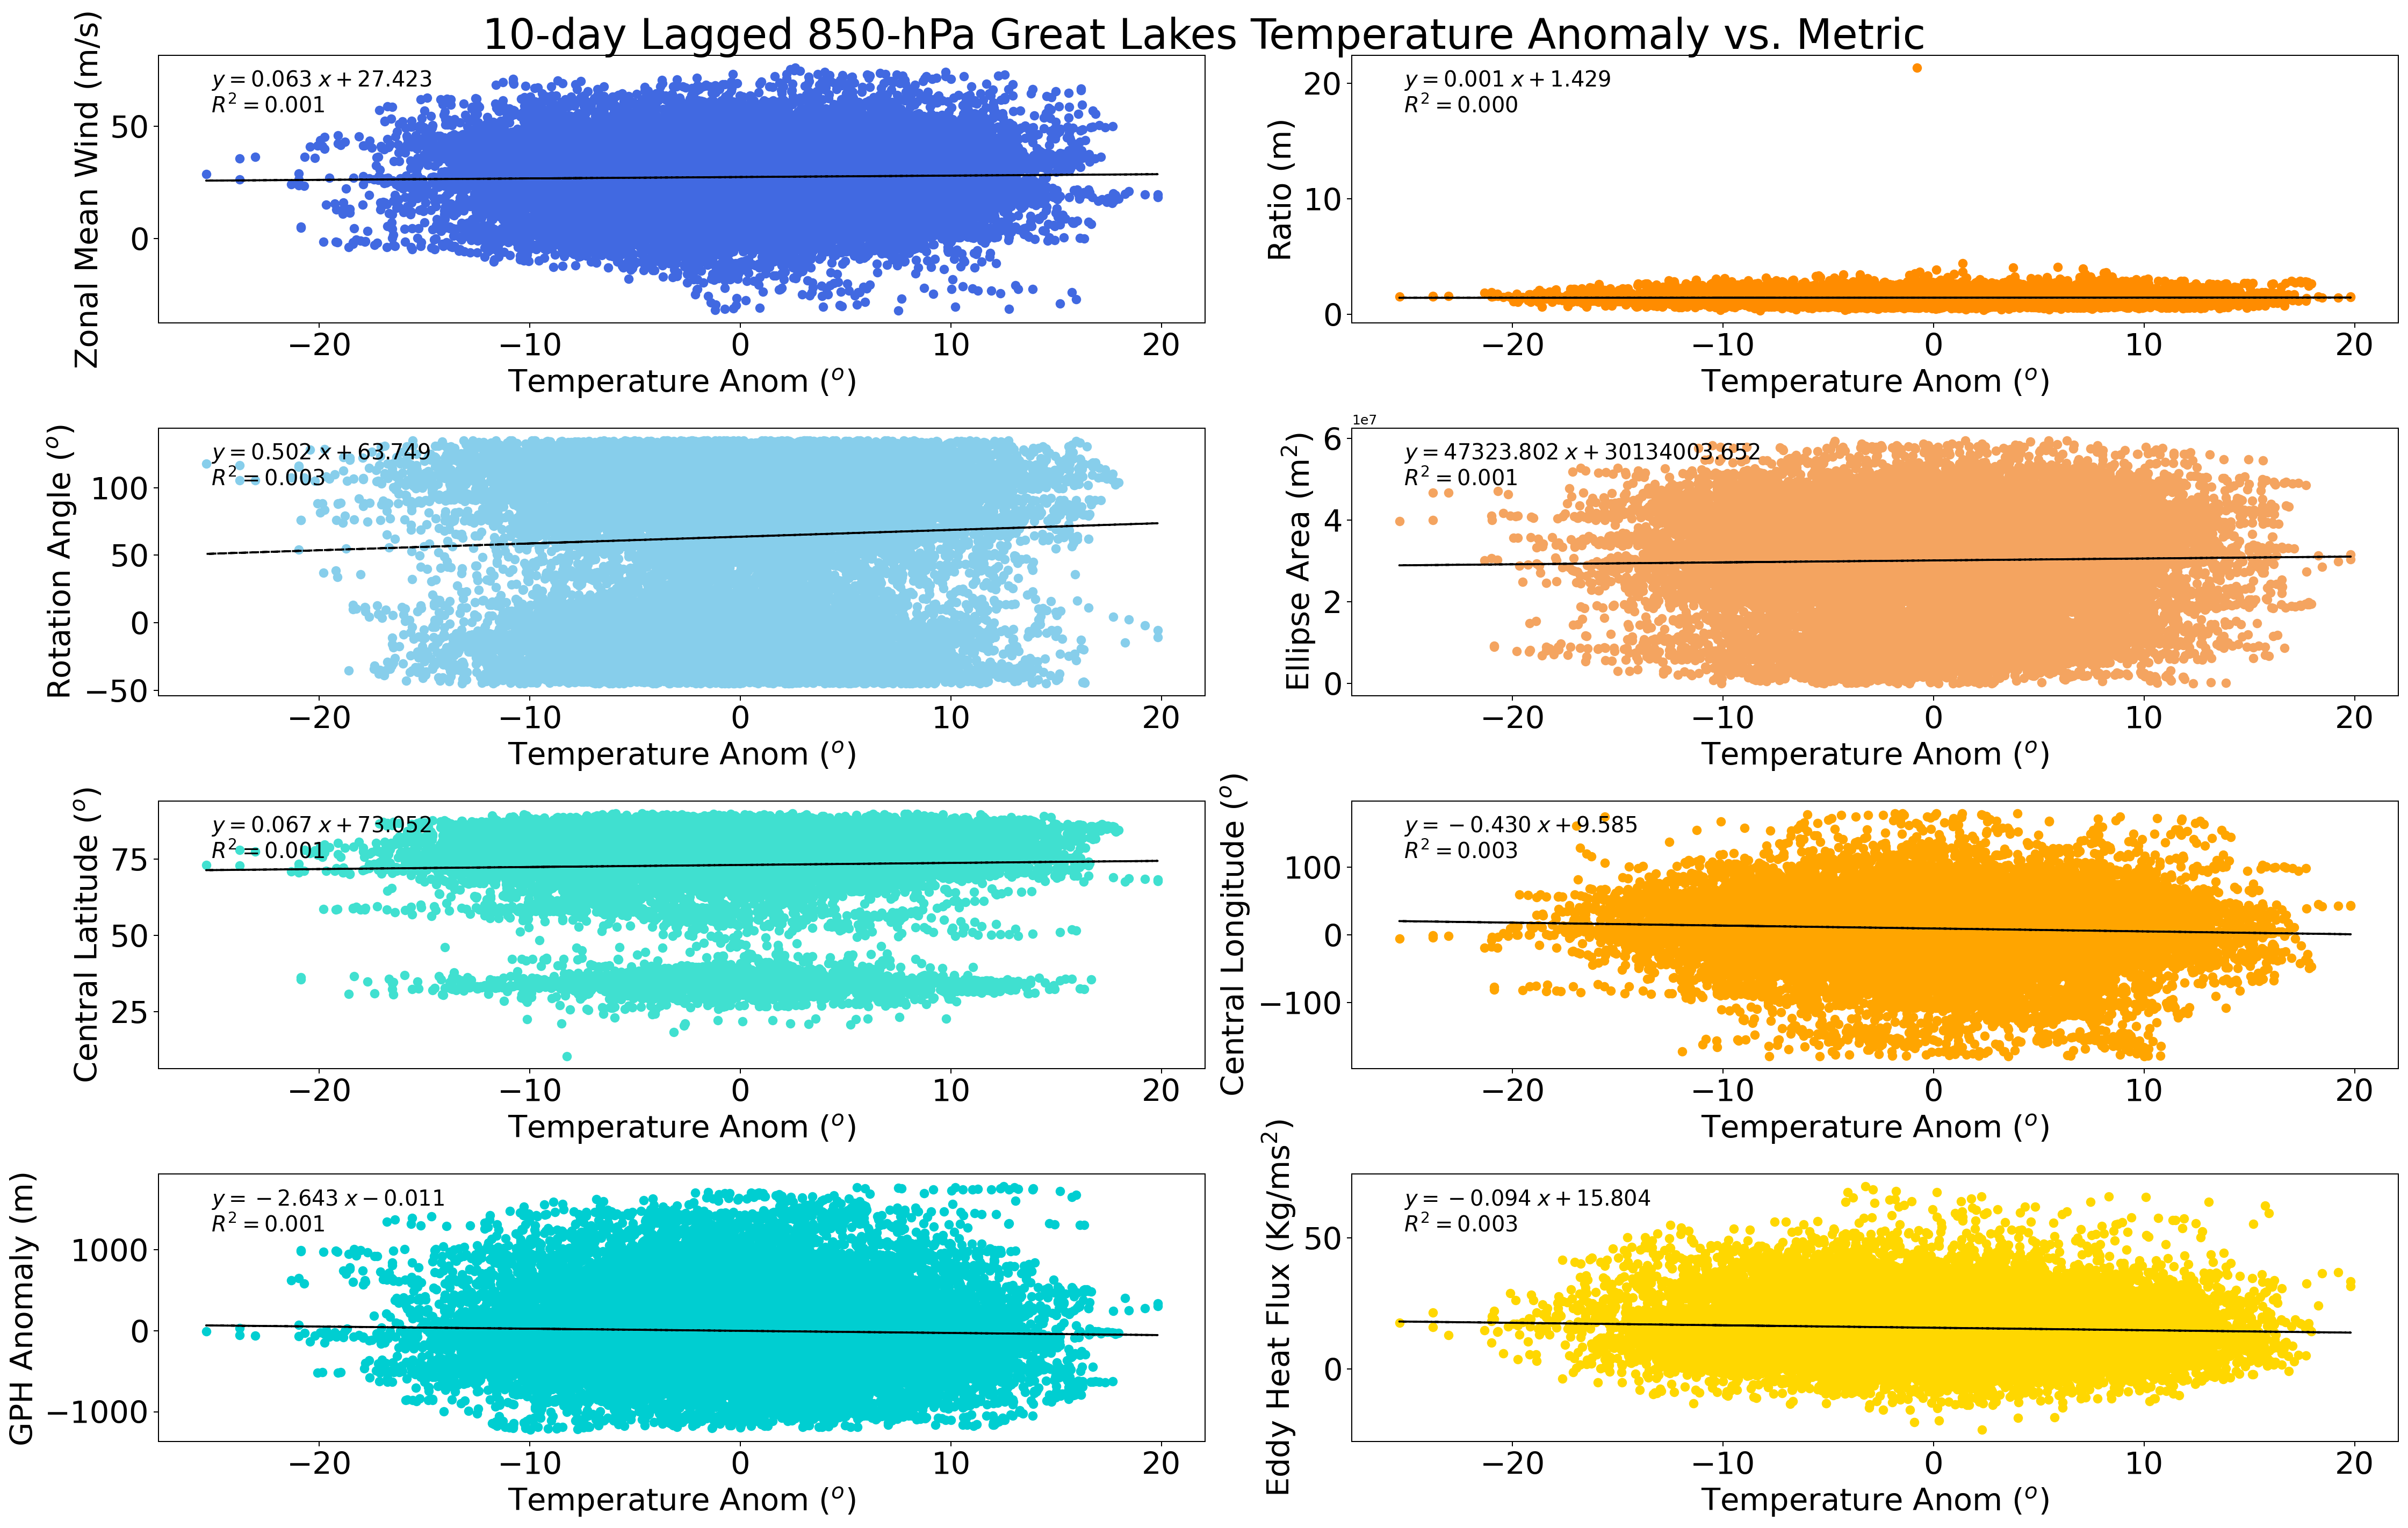

In [33]:
%matplotlib inline
from sklearn.metrics import r2_score
import matplotlib.ticker as mticker

fig = plt.figure(figsize=(25,16),dpi=180)
fig.suptitle("10-day Lagged 850-hPa Great Lakes Temperature Anomaly vs. Metric",fontsize = 31) 

#loop through each member
ax1 = plt.subplot(4,2,1)
ax2 = plt.subplot(4,2,2)
ax3 = plt.subplot(4,2,3)
ax4 = plt.subplot(4,2,4)
ax5 = plt.subplot(4,2,5)
ax6 = plt.subplot(4,2,6)
ax7 = plt.subplot(4,2,7)
ax8 = plt.subplot(4,2,8)

z = np.polyfit(tw, w_mn, 1)
y_hat = np.poly1d(z)(tw)
p = np.poly1d(z)
ax1.scatter(tw,w_mn, color = 'royalblue')
ax1.plot(tw,p(tw),"k--")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(w_mn,y_hat):0.3f}$"
ax1.text(0.05, 0.95, text,transform=ax1.transAxes,
     fontsize=16, verticalalignment='top')
ax1.set_xlabel('Temperature Anom ($^o$)',fontsize = 23)
ax1.set_ylabel('Zonal Mean Wind (m/s)',fontsize = 23)
ax1.tick_params(axis='both', which='major', labelsize=23);
    
z = np.polyfit(tr, r_mn, 1)
y_hat = np.poly1d(z)(tr)
p = np.poly1d(z)
ax2.scatter(tr,r_mn, color = 'darkorange')
ax2.plot(tr,p(tr),"k--")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(r_mn,y_hat):0.3f}$"
ax2.text(0.05, 0.95, text,transform=ax2.transAxes,
     fontsize=16, verticalalignment='top')
ax2.set_xlabel('Temperature Anom ($^o$)',fontsize = 23)
ax2.set_ylabel('Ratio (m)',fontsize = 23)
ax2.tick_params(axis='both', which='major', labelsize=23);
    
z = np.polyfit(te, e_mn, 1)
y_hat = np.poly1d(z)(te)
p = np.poly1d(z)
ax3.scatter(te,e_mn, color = 'skyblue')
ax3.plot(te,p(te),"k--")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(e_mn,y_hat):0.3f}$"
ax3.text(0.05, 0.95, text,transform=ax3.transAxes,
     fontsize=16, verticalalignment='top')
ax3.set_xlabel('Temperature Anom ($^o$)', fontsize = 23)
ax3.set_ylabel('Rotation Angle ($^o$)', fontsize = 23)
ax3.tick_params(axis='both', which='major', labelsize=23);

z = np.polyfit(ts, s_mn, 1)
y_hat = np.poly1d(z)(ts)
p = np.poly1d(z)
ax4.scatter(ts,s_mn, color = 'sandybrown')
ax4.plot(ts,p(ts),"k--")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(s_mn,y_hat):0.3f}$"
ax4.text(0.05, 0.95, text,transform=ax4.transAxes,
     fontsize=16, verticalalignment='top')
ax4.set_xlabel('Temperature Anom ($^o$)', fontsize = 23)
ax4.set_ylabel('Ellipse Area (m$^2$)', fontsize = 23)
ax4.tick_params(axis='both', which='major', labelsize=23);
    
z = np.polyfit(tct, ct_mn, 1)
y_hat = np.poly1d(z)(tct)
p = np.poly1d(z)
ax5.scatter(tct,ct_mn, color = 'turquoise')
ax5.plot(tct,p(tct),"k--")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(ct_mn,y_hat):0.3f}$"
ax5.text(0.05, 0.95, text,transform=ax5.transAxes,
     fontsize=16, verticalalignment='top')
ax5.set_xlabel('Temperature Anom ($^o$)', fontsize = 23)
ax5.set_ylabel('Central Latitude ($^o$)', fontsize = 23)
ax5.tick_params(axis='both', which='major', labelsize=23);
    
z = np.polyfit(tcn, cn_mn, 1)
y_hat = np.poly1d(z)(tcn)
p = np.poly1d(z)
ax6.scatter(tcn,cn_mn, color = 'orange')
ax6.plot(tcn,p(tcn),"k--")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(cn_mn,y_hat):0.3f}$"
ax6.text(0.05, 0.95, text,transform=ax6.transAxes,
    fontsize=16, verticalalignment='top')
ax6.set_xlabel('Temperature Anom ($^o$)', fontsize = 23)
ax6.set_ylabel('Central Longitude ($^o$)', fontsize = 23)
ax6.tick_params(axis='both', which='major', labelsize=23);
    
z = np.polyfit(tg, g_mn, 1)
y_hat = np.poly1d(z)(tg)
p = np.poly1d(z)
ax7.scatter(tg, g_mn, color = 'darkturquoise')
ax7.plot(tg,p(tg),"k--")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(g_mn,y_hat):0.3f}$"
ax7.text(0.05, 0.95, text,transform=ax7.transAxes,
    fontsize=16, verticalalignment='top')
ax7.set_xlabel('Temperature Anom ($^o$)', fontsize = 23)
ax7.set_ylabel('GPH Anomaly (m)', fontsize = 23)
ax7.tick_params(axis='both', which='major', labelsize= 23);
    
z = np.polyfit(teh, eh_mn, 1)
y_hat = np.poly1d(z)(teh)
p = np.poly1d(z)
ax8.scatter(teh,eh_mn, color = 'gold')
ax8.plot(teh,p(teh),"k--")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(eh_mn,y_hat):0.3f}$"
ax8.text(0.05, 0.95, text,transform= ax8.transAxes,
    fontsize=16, verticalalignment='top')
ax8.set_xlabel('Temperature Anom ($^o$)', fontsize = 23)
ax8.set_ylabel('Eddy Heat Flux (Kg/ms$^2$)', fontsize = 23)
ax8.tick_params(axis='both', which='major', labelsize= 23);

plt.tight_layout()
plt.show()
fig.savefig("10hPa_10Climo_GL.png")
